In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
# Импортируем данные.
data = pd.read_excel('Данные.xlsx')
clients = pd.read_excel('Clients.xlsx')
region_dict = pd.read_excel('Region.xlsx')

In [3]:
data

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468
...,...,...,...,...
37984,297586,NaN,NaN,NaT
37985,297593,179230.0,5755.0,2022-09-05 03:29:07.726
37986,297595,192530.0,4448.0,2022-09-27 23:50:05.734
37987,297601,183888.0,1746.0,2022-10-13 14:23:03.073


In [4]:
clients

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
1,193942,NaT,0,13
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


In [5]:
region_dict

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [6]:
# Проверяем наличие пропусков и удаляем их.
region_dict.info()
print(region_dict.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_trading_point  66 non-null     int64 
 1   city              66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB
id_trading_point    0
city                0
dtype: int64


In [7]:
data.info()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37989 entries, 0 to 37988
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_order     37989 non-null  int64         
 1   id_client    37401 non-null  float64       
 2   amt_payment  35845 non-null  float64       
 3   dtime_pay    35560 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 1.2 MB
id_order          0
id_client       588
amt_payment    2144
dtime_pay      2429
dtype: int64


In [8]:
clients.info()
print(clients.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55605 entries, 0 to 55604
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_client         55605 non-null  int64         
 1   dtime_ad          55356 non-null  datetime64[ns]
 2   nflag_test        55605 non-null  int64         
 3   id_trading_point  55605 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.7 MB
id_client             0
dtime_ad            249
nflag_test            0
id_trading_point      0
dtype: int64


In [9]:
# В таблице clients удаляем нулловые значения, т.к. потеря данных составит менее 1%.
clients.dropna(inplace = True)
clients.isna().sum()

id_client           0
dtime_ad            0
nflag_test          0
id_trading_point    0
dtype: int64

In [10]:
# Нулловый id_client не позволит верно идентифицировать клиентов, поэтому удалим. Также удалим нулловые dtime_pay, в столбце amt_payment.
# В таблице Данные пропусков нет.
data.dropna(inplace = True)
data.isna().sum()
data

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468
...,...,...,...,...
37983,297572,195257.0,2191.0,2022-08-21 18:31:51.585
37985,297593,179230.0,5755.0,2022-09-05 03:29:07.726
37986,297595,192530.0,4448.0,2022-09-27 23:50:05.734
37987,297601,183888.0,1746.0,2022-10-13 14:23:03.073


In [11]:
# Проверяем наличие дубликатов. Дубликатов не было.
data.drop_duplicates()

,id_order,id_client,amt_payment,dtime_pay
0,100238,194569.0,5373.0,2022-10-28 04:05:15.221
1,100242,191056.0,4151.0,2022-08-01 02:42:54.992
2,100249,200049.0,5688.0,2022-08-24 12:45:12.744
3,100258,206161.0,4330.0,2022-12-09 15:13:26.437
4,100267,190945.0,5488.0,2022-08-03 02:07:31.468
...,...,...,...,...
37983,297572,195257.0,2191.0,2022-08-21 18:31:51.585
37985,297593,179230.0,5755.0,2022-09-05 03:29:07.726
37986,297595,192530.0,4448.0,2022-09-27 23:50:05.734
37987,297601,183888.0,1746.0,2022-10-13 14:23:03.073


In [12]:
clients.drop_duplicates()

,id_client,dtime_ad,nflag_test,id_trading_point
0,180844,2022-06-08 18:38:41.414,0,212
2,226069,2022-07-11 16:28:38.511,1,54
3,183981,2022-06-16 12:23:59.289,1,991
4,322530,2022-07-08 08:56:08.714,0,1015
5,254313,2022-06-19 22:18:01.770,1,453
...,...,...,...,...
55600,193038,2022-07-09 00:31:25.196,0,1015
55601,244069,2022-08-08 00:12:31.319,1,991
55602,189084,2022-06-29 04:34:42.610,1,439
55603,182758,2022-06-13 11:28:37.856,1,573


In [13]:
region_dict.drop_duplicates()

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [14]:
# Проверяем данные на выбросы.
data.describe()

,id_order,id_client,amt_payment,dtime_pay
count,35560.000000,35560.000000,35560.000000,35560
mean,197768.890804,194089.864511,3542.339623,2022-09-15 22:58:39.975964928
min,100238.000000,178561.000000,498.000000,2022-06-03 17:48:54.432000
25%,148567.000000,186352.750000,2581.000000,2022-08-13 07:47:47.644999936
50%,197639.500000,194074.500000,3470.000000,2022-09-15 22:39:11.937999872
75%,246340.500000,201863.250000,4390.000000,2022-10-18 23:45:59.007500032
max,297607.000000,209634.000000,7633.000000,2022-12-28 22:57:20.608000
std,56689.034409,8973.216267,1427.383578,NaN


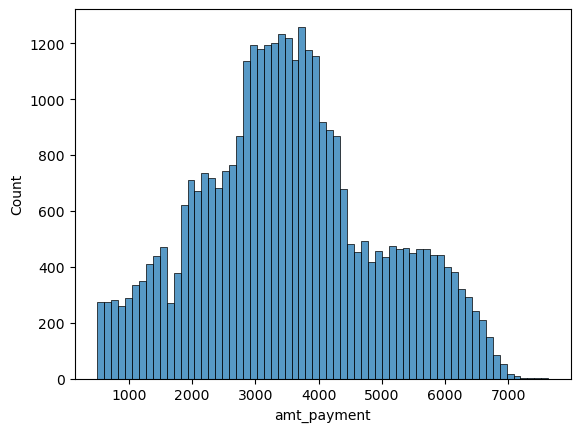

In [15]:
sns.histplot(data['amt_payment'])
plt.show()
# Выбросов нет

In [16]:
# Убедимся, что каждый пользователь встречается только в одной группе: либо в контрольной, либо в тестовой.
clients_gr = clients.groupby('id_client').agg({'nflag_test': 'nunique'}).sort_values('nflag_test', ascending = False).reset_index()
clients_gr = clients_gr[clients_gr['nflag_test'] == 2]
clients_gr

,id_client,nflag_test


In [17]:
region_dict

,id_trading_point,city
0,1,Петрозаводск
1,2,Дмитров
2,4,Чехов
3,7,Ростов Великий
4,11,Владимир
...,...,...
61,3987,Москва
62,6543,Москва
63,8543,Москва
64,9121,Москва


In [18]:
# Исследуем количество торговых точек в каждом городе.

cnt_point_city = region_dict.groupby('city').agg(cnt = ('id_trading_point', 'count')).sort_values(by = 'cnt', ascending = False).reset_index()
cnt_point_city

,city,cnt
0,Москва,11
1,Санкт-Петербург,11
2,Казань,6
3,Новосибирск,6
4,Красноярск,5
5,Самара,4
6,Краснодар,4
7,Саратов,2
8,Сочи,2
9,Мурманск,2


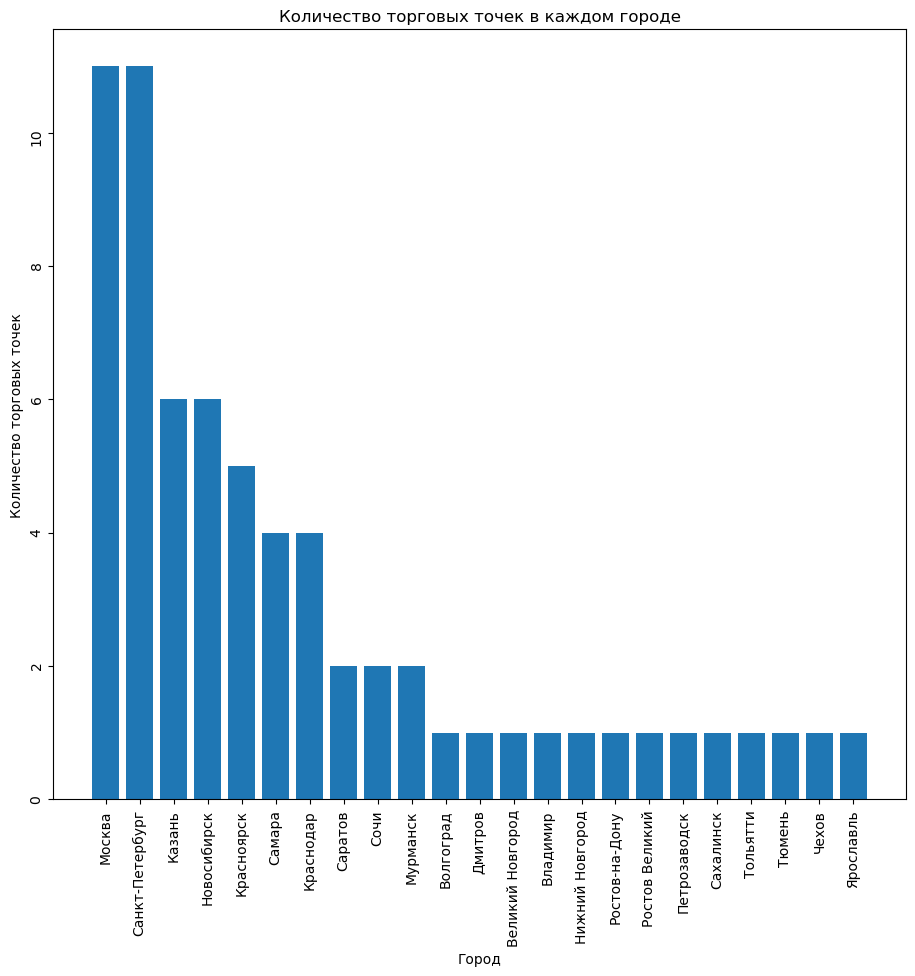

In [19]:
# Построим график.
plt.figure(figsize = (11, 10))
plt.bar(cnt_point_city['city'], cnt_point_city['cnt'])
plt.xlabel('Город')
plt.ylabel('Количество торговых точек')
plt.title('Количество торговых точек в каждом городе')
plt.tick_params(rotation=90)
plt.show()

In [20]:
# Группируем платежи по клиентам.
data_gr = data.groupby('id_client').agg(sum_pay = ('amt_payment', 'sum')).reset_index()
data_gr

,id_client,sum_pay
0,178561.0,3052.0
1,178562.0,2439.0
2,178563.0,768.0
3,178565.0,958.0
4,178566.0,5474.0
...,...,...
28378,209630.0,6927.0
28379,209631.0,2090.0
28380,209632.0,2775.0
28381,209633.0,1673.0


In [21]:
# Объединяем таблицы data и clients.
data_clients = data_gr.merge(clients, on = 'id_client', how = 'right')
data_clients

,id_client,sum_pay,dtime_ad,nflag_test,id_trading_point
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212
1,226069.0,NaN,2022-07-11 16:28:38.511,1,54
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991
3,322530.0,NaN,2022-07-08 08:56:08.714,0,1015
4,254313.0,NaN,2022-06-19 22:18:01.770,1,453
...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015
55352,244069.0,NaN,2022-08-08 00:12:31.319,1,991
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573


In [22]:
# Заменяем NaN на 0 в столбце sum_pay.
data_clients['sum_pay'] = data_clients['sum_pay'].fillna(0)
data_clients

,id_client,sum_pay,dtime_ad,nflag_test,id_trading_point
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453
...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573


In [23]:
# Объединяем таблицы data_clients и region_dict.
data_clients_region = data_clients.merge(region_dict, on = 'id_trading_point', how = 'left')
data_clients_region

,id_client,sum_pay,dtime_ad,nflag_test,id_trading_point,city
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212,Красноярск
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54,Мурманск
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991,Казань
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015,Краснодар
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453,Санкт-Петербург
...,...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015,Краснодар
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991,Казань
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439,Казань
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573,Санкт-Петербург


In [24]:
# Создаем поле флаг платежа, который принимает значения 0 или 1 в зависимости от того, заплатил клиент или нет.
data_clients_region['flag_pay'] = np.where(data_clients_region['sum_pay'] > 0, 1, 0)
data_clients_region

,id_client,sum_pay,dtime_ad,nflag_test,id_trading_point,city,flag_pay
0,180844.0,5349.0,2022-06-08 18:38:41.414,0,212,Красноярск,1
1,226069.0,0.0,2022-07-11 16:28:38.511,1,54,Мурманск,0
2,183981.0,6322.0,2022-06-16 12:23:59.289,1,991,Казань,1
3,322530.0,0.0,2022-07-08 08:56:08.714,0,1015,Краснодар,0
4,254313.0,0.0,2022-06-19 22:18:01.770,1,453,Санкт-Петербург,0
...,...,...,...,...,...,...,...
55351,193038.0,5846.0,2022-07-09 00:31:25.196,0,1015,Краснодар,1
55352,244069.0,0.0,2022-08-08 00:12:31.319,1,991,Казань,0
55353,189084.0,7146.0,2022-06-29 04:34:42.610,1,439,Казань,1
55354,182758.0,13720.0,2022-06-13 11:28:37.856,1,573,Санкт-Петербург,1


In [25]:
# Создаем функцию, которая будет вычислять значение t-критерия (критерия Стьюдента) и p_value для сравнения средних и с помощью функции 
# print выводить сообщение о том, существует ли разница между средними (на основании p_value).

def test_calc (r1, r2, alpha = 0.05):
    s, p = ttest_ind(r1,r2)
    s, p
    if p <= alpha:
         if r1.mean() > r2.mean():
             print(s, p)
             print('Гипотеза отвергается, среднее в тестовой группе выше')
         else: 
             print(s, p)
             print('Гипотеза отвергается, среднее в контрольной группе выше')
    else: 
        print(s, p)
        print('Гипотеза не отвергается, средние не значимо различаются')


In [26]:
# Создаем функцию mann_whitney_func, которая будет рассчитывать значение критерия Манна Уитни и p_value для сравнения распределений 
# и с помощью функции print выводить сообщение о том, существует ли разница между средними (на основании p_value).

def mann_whitney_func (r1, r2, alpha = 0.05):
    mw_stat, p_value = mannwhitneyu(r1, r2)
    mw_stat, p_value
    if p_value <= alpha:
         if r1.mean() > r2.mean():
             print(mw_stat, p_value)
             print('Гипотеза отвергается, среднее в тестовой группе выше')
         else: 
             print(mw_stat, p_value)
             print('Гипотеза отвергается, среднее в контрольной группе выше')
    else: 
        print(mw_stat, p_value)
        print('Гипотеза не отвергается, средние не значимо различаются')

In [27]:
# Чистка неверно заполненных точек.
abc = []

for i in data_clients_region['id_trading_point'].unique():
    sum_t = data_clients_region[(data_clients_region['id_trading_point'] == i) & (data_clients_region['nflag_test'] == 1)]['sum_pay'].sum()
    sum_c = data_clients_region[(data_clients_region['id_trading_point'] == i) & (data_clients_region['nflag_test'] == 0)]['sum_pay'].sum()
    if (sum_t == 0) | (sum_c == 0):
        abc.append(i)
abc

[np.int64(1015),
 np.int64(866),
 np.int64(1099),
 np.int64(739),
 np.int64(46),
 np.int64(228),
 np.int64(26),
 np.int64(603),
 np.int64(810),
 np.int64(800),
 np.int64(7),
 np.int64(23),
 np.int64(4),
 np.int64(1),
 np.int64(13)]

In [28]:
empty = []

for i in data_clients_region['id_trading_point'].unique():
    cnt_t = data_clients_region[(data_clients_region['id_trading_point'] == i) & (data_clients_region['nflag_test'] == 1)]['id_client'].count()
    cnt_c = data_clients_region[(data_clients_region['id_trading_point'] == i) & (data_clients_region['nflag_test'] == 0)]['id_client'].count()
    if (cnt_t == 0) | (cnt_t == 0):
        empty.append(i)
empty

[np.int64(1015), np.int64(866), np.int64(1099), np.int64(810), np.int64(800)]

In [29]:
df = data_clients_region[(~data_clients_region['id_trading_point'].isin(empty+abc))]

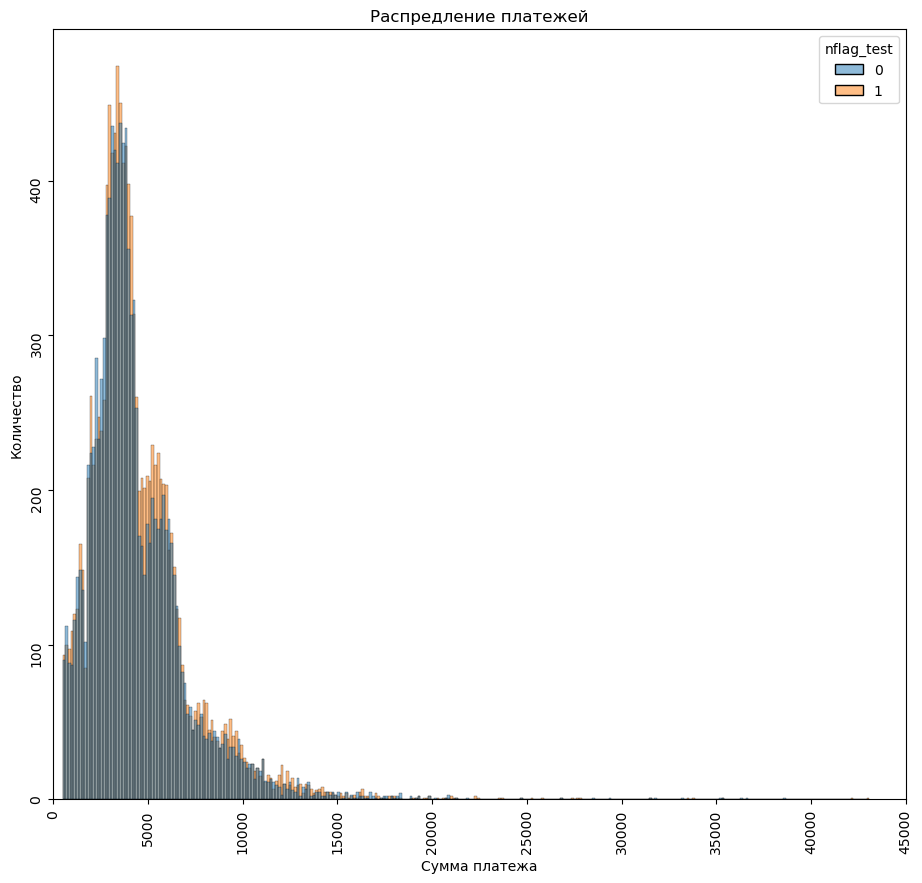

In [30]:
# Построим график.
plt.figure(figsize = (11, 10))

sns.histplot(data = df[df['sum_pay'] != 0], x="sum_pay", bins=300, hue="nflag_test")
plt.xlabel('Сумма платежа')
plt.ylabel('Количество')
plt.title('Распредление платежей')
plt.tick_params(rotation=90)
plt.xlim([0, 45000])
plt.show()


In [31]:
# Посмотрим метрики для анализа после очистки данных.
df_control = df[df['nflag_test']==0]
df_test = df[df['nflag_test']==1]

print('Конверсии')
print(df_control['flag_pay'].mean())
print(df_test['flag_pay'].mean())
print('\n')
print('Средний чек')
print(df_control['sum_pay'].mean())
print(df_test['sum_pay'].mean())
print('\n')
print('Количество наблюдений')
print(df_control['id_client'].count())
print(df_test['id_client'].count())

Конверсии
0.49975954181786386
0.5432835820895522


Средний чек
2189.1884317754557
2452.2773446201827


Количество наблюдений
22873
22445


In [32]:
df.describe()

,id_client,sum_pay,dtime_ad,nflag_test,id_trading_point,flag_pay
count,45318.000000,45318.000000,45318,45318.000000,45318.000000,45318.000000
mean,228009.605918,2319.490534,2022-07-14 23:17:54.647861760,0.495278,1202.962002,0.521316
min,178561.000000,0.000000,2022-06-03 02:47:49.183000,0.000000,2.000000,0.000000
25%,192426.250000,0.000000,2022-06-24 20:46:29.189250048,0.000000,112.000000,0.000000
50%,206413.500000,1178.000000,2022-07-14 20:48:29.227500032,0.000000,453.000000,1.000000
75%,262840.000000,3911.000000,2022-08-03 19:26:37.676750080,1.000000,1654.000000,1.000000
max,331964.000000,43083.000000,2022-08-29 00:02:17.878000,1.000000,9931.000000,1.000000
std,45298.985278,2963.928692,NaN,0.499983,1792.091001,0.499551


In [33]:
# Расчет общих результатов A/B-теста.
test_calc (r1 = df_test['sum_pay'], r2 = df_control['sum_pay'], alpha = 0.05)
print('\n')

9.456798235171377 3.3214645838934018e-21
Гипотеза отвергается, среднее в тестовой группе выше




In [34]:
test_calc (r1 = df_test['flag_pay'], r2 = df_control['flag_pay'], alpha = 0.05)
print('\n')

9.282032730948323 1.7338073027564523e-20
Гипотеза отвергается, среднее в тестовой группе выше




In [35]:
mann_whitney_func (r1 = df_test['sum_pay'], r2 = df_control['sum_pay'], alpha = 0.05)
print('\n')

270040116.0 3.008345273971901e-24
Гипотеза отвергается, среднее в тестовой группе выше




In [36]:
mann_whitney_func (r1 = df_test['flag_pay'], r2 = df_control['flag_pay'], alpha = 0.05)
print('\n')

267864526.0 1.8043406994299902e-20
Гипотеза отвергается, среднее в тестовой группе выше




In [37]:
# Сегментация результатов A/B-теста.
print("Москва")
print('Средний платеж')
test_calc (r1 = df_test[df_test['city']== 'Москва']['sum_pay'], r2 = df_control[df_control['city']== 'Москва']['sum_pay'], alpha = 0.05)
print('\n') 
print('Конверсия')
test_calc (r1 = df_test[df_test['city']== 'Москва']['flag_pay'], r2 = df_control[df_control['city']== 'Москва']['flag_pay'], alpha = 0.05)
print('\n') 
print('Средний платеж')
mann_whitney_func (r1 = df_test[df_test['city']== 'Москва']['sum_pay'], r2 = df_control[df_control['city']== 'Москва']['sum_pay'], alpha = 0.05)
print('\n')
print('Конверсия')
mann_whitney_func (r1 = df_test[df_test['city']== 'Москва']['flag_pay'], r2 = df_control[df_control['city']== 'Москва']['flag_pay'], alpha = 0.05)
print('\n') 

Москва
Средний платеж
7.676511027843395 1.757549439555765e-14
Гипотеза отвергается, среднее в тестовой группе выше


Конверсия
6.190312288026295 6.194689260032594e-10
Гипотеза отвергается, среднее в тестовой группе выше


Средний платеж
20595574.5 7.010591402203484e-16
Гипотеза отвергается, среднее в тестовой группе выше


Конверсия
20149937.0 6.370381156613038e-10
Гипотеза отвергается, среднее в тестовой группе выше




In [38]:
print("Санкт-Петербург")
print('Средний платеж')
test_calc (r1 = df_test[df_test['city']== 'Санкт-Петербург']['sum_pay'], r2 = df_control[df_control['city']== 'Санкт-Петербург']['sum_pay'], alpha = 0.05)
print('\n')
print('Конверсия')
test_calc (r1 = df_test[df_test['city']== 'Санкт-Петербург']['flag_pay'], r2 = df_control[df_control['city']== 'Санкт-Петербург']['flag_pay'], alpha = 0.05)
print('\n')
print('Средний платеж')
mann_whitney_func (r1 = df_test[df_test['city']== 'Санкт-Петербург']['sum_pay'], r2 = df_control[df_control['city']== 'Санкт-Петербург']['sum_pay'], alpha = 0.05)
print('\n')
print('Конверсия')
mann_whitney_func (r1 = df_test[df_test['city']== 'Санкт-Петербург']['flag_pay'], r2 = df_control[df_control['city']== 'Санкт-Петербург']['flag_pay'], alpha = 0.05)
print('\n')

Санкт-Петербург
Средний платеж
8.759635784179547 2.3198088937974163e-18
Гипотеза отвергается, среднее в тестовой группе выше


Конверсия
9.352468686561785 1.065825659919673e-20
Гипотеза отвергается, среднее в тестовой группе выше


Средний платеж
10899685.5 2.0392184217953754e-20
Гипотеза отвергается, среднее в тестовой группе выше


Конверсия
10827979.0 1.3118606823466691e-20
Гипотеза отвергается, среднее в тестовой группе выше




In [39]:
for i in df['city'].unique():
    if (i != 'Москва') & (i != 'Санкт-Петербург'):
        print('\n')
        print(i)
        print('\n')
        print('Средний платеж')
        test_calc (r1 = df_test[df_test['city'] == i]['sum_pay'], r2 = df_control[df_control['city'] == i]['sum_pay'], alpha = 0.05)
        print('Конверсия')
        test_calc (r1 = df_test[df_test['city'] == i]['flag_pay'], r2 = df_control[df_control['city'] == i]['flag_pay'], alpha = 0.05)
        print('Средний платеж')
        mann_whitney_func (r1 = df_test[df_test['city'] == i]['sum_pay'], r2 = df_control[df_control['city'] == i]['sum_pay'], alpha = 0.05)
        print('Конверсия')
        mann_whitney_func (r1 = df_test[df_test['city'] == i]['flag_pay'], r2 = df_control[df_control['city'] == i]['flag_pay'], alpha = 0.05)
    



Красноярск


Средний платеж
0.12000608689929208 0.9044823881233125
Гипотеза не отвергается, средние не значимо различаются
Конверсия
-0.27863631219717744 0.7805336501430107
Гипотеза не отвергается, средние не значимо различаются
Средний платеж
4393882.0 0.8770469886251647
Гипотеза не отвергается, средние не значимо различаются
Конверсия
4387832.0 0.7805140863923713
Гипотеза не отвергается, средние не значимо различаются


Мурманск


Средний платеж
0.06902498862889384 0.9449762446327565
Гипотеза не отвергается, средние не значимо различаются
Конверсия
0.8460108060373052 0.3976422846466432
Гипотеза не отвергается, средние не значимо различаются
Средний платеж
569507.5 0.5434251528583327
Гипотеза не отвергается, средние не значимо различаются
Конверсия
572005.0 0.3975381533962302
Гипотеза не отвергается, средние не значимо различаются


Казань


Средний платеж
1.0655273408818378 0.286688049247618
Гипотеза не отвергается, средние не значимо различаются
Конверсия
0.27304492857426443 0.784

In [40]:
ab_res = pd.DataFrame(columns = ['city', 'id_trading_point', 'count_test', 'count_control', 'count_all', 'percent_count', 'avg_payment_test', \
'avg_payment_control', 'diff', 'sigma_test', 'sigma_control', 'ttest', 'pvalue_ttest','flag_res'])

for i in df['city'].unique():
    df_city = df[df['city'] == i]
    for j in df_city['id_trading_point'].unique():
        df_point = df_city[df_city['id_trading_point'] == j]
        
        cnt_test = df_point[df_point['nflag_test'] == 1]['id_client'].count()
        cnt_control = df_point[df_point['nflag_test'] == 0]['id_client'].count()
        cnt_all = df_point['id_client'].count()
        percent_cnt =  (cnt_all / df['id_client'].count() )*100
        avg_payment_t = df_point[df_point['nflag_test'] == 1]['sum_pay'].mean()
        avg_payment_c = df_point[df_point['nflag_test'] == 0]['sum_pay'].mean()
        diff = avg_payment_t - avg_payment_c
        sigma_t = df_point[df_point['nflag_test'] == 1]['sum_pay'].std()
        sigma_c = df_point[df_point['nflag_test'] == 0]['sum_pay'].std()
        s, p = ttest_ind (df_point[df_point['nflag_test'] == 1]['sum_pay'], df_point[df_point['nflag_test'] == 0]['sum_pay'])
           
        if (p > 0.05):
            flag_res = 'neutral'
        elif (diff < 0) & (p <= 0.05):
            flag_res = 'negative'
        elif (diff > 0) & (p <= 0.05):
            flag_res = 'positive'
        ab_res = pd.concat([ab_res, pd.DataFrame({'city':[i],'id_trading_point':[j], 'count_test':[cnt_test], 'count_control':[cnt_control], 'count_all':[cnt_all], \
                                'percent_count':[percent_cnt], 'avg_payment_test':[avg_payment_t], 'avg_payment_control':[avg_payment_c],\
                                'diff':[diff], 'sigma_test':[sigma_t], 'sigma_control':[sigma_c], 'ttest':[s], 'pvalue_ttest':[p], \
                                'flag_res':[flag_res]})],  ignore_index=True)
ab_res 

C:\Users\PC\AppData\Local\Temp\ipykernel_21488\2567755850.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ab_res = pd.concat([ab_res, pd.DataFrame({'city':[i],'id_trading_point':[j], 'count_test':[cnt_test], 'count_control':[cnt_control], 'count_all':[cnt_all], \


,city,id_trading_point,count_test,count_control,count_all,percent_count,avg_payment_test,avg_payment_control,diff,sigma_test,sigma_control,ttest,pvalue_ttest,flag_res
0,Красноярск,212,593,575,1168,2.577342,2144.317032,2222.052174,-77.735142,2708.588724,2785.116250,-0.483585,6.287709e-01,neutral
1,Красноярск,278,535,489,1024,2.259588,2499.345794,2185.214724,314.131070,2915.995329,2574.915597,1.820268,6.901056e-02,neutral
2,Красноярск,202,551,565,1116,2.462598,2927.341198,2730.378761,196.962437,2956.686241,2737.885785,1.155073,2.483083e-01,neutral
3,Красноярск,444,650,562,1212,2.674434,2404.106154,2545.734875,-141.628722,2810.828487,2797.138764,-0.876740,3.808017e-01,neutral
4,Красноярск,277,708,709,1417,3.126793,2285.750000,2431.365303,-145.615303,2712.677878,2868.587569,-0.981705,3.264128e-01,neutral
5,Мурманск,54,633,640,1273,2.809038,1702.714060,1688.512500,14.201560,2565.132440,2628.012490,0.097556,9.223005e-01,neutral
6,Мурманск,55,422,425,847,1.869015,2109.106635,2111.272941,-2.166306,2790.993385,2804.223188,-0.011268,9.910125e-01,neutral
7,Казань,991,270,294,564,1.244539,3249.281481,2452.986395,796.295087,4719.592601,3633.935858,2.255258,2.450100e-02,positive
8,Казань,699,482,494,976,2.153670,2422.286307,2574.352227,-152.065920,3906.817897,4082.851356,-0.594254,5.524804e-01,neutral
9,Казань,477,382,386,768,1.694691,2259.623037,2496.987047,-237.364010,3482.846094,3881.994719,-0.891593,3.728909e-01,neutral


In [41]:
df1 = ab_res[ab_res['flag_res']=='neutral']
df2 = ab_res[ab_res['flag_res']=='positive']
df3 = ab_res[ab_res['flag_res']=='negative']

In [42]:
!pip install xlsxwriter
writer = pd.ExcelWriter("pandas_multiple.xlsx", engine="xlsxwriter")


df1.to_excel(writer, sheet_name="Sheet1")
df2.to_excel(writer, sheet_name="Sheet2")
df3.to_excel(writer, sheet_name="Sheet3")


writer.close()

PermissionError: [Errno 13] Permission denied: 'pandas_multiple.xlsx'